# 03 - Aircraft Comparison

Compare optimized airfoil performance against real aircraft.

In [1]:
import sys
sys.path.append('..')

import json
import numpy as np
import matplotlib.pyplot as plt
from src.validation.aircraft_benchmark import AircraftBenchmark, AIRCRAFT_DATABASE

## Load Aircraft Database

In [2]:
# Display aircraft specs
for aircraft_id, specs in AIRCRAFT_DATABASE.items():
    print(f"\n{specs.name}")
    print(f"  Cruise L/D: {specs.cruise_ld_ratio}")
    print(f"  Cruise Mach: {specs.cruise_mach}")
    print(f"  Airfoil type: {specs.airfoil_type}")


Boeing 737-800
  Cruise L/D: 17.5
  Cruise Mach: 0.785
  Airfoil type: NACA 23012 derivative / BAC

Boeing 787-9
  Cruise L/D: 21.0
  Cruise Mach: 0.85
  Airfoil type: Advanced supercritical

Airbus A320neo
  Cruise L/D: 18.5
  Cruise Mach: 0.78
  Airfoil type: Supercritical

F-15 Eagle
  Cruise L/D: 8.5
  Cruise Mach: 0.9
  Airfoil type: NACA 64A

Cessna 172 Skyhawk
  Cruise L/D: 12.5
  Cruise Mach: 0.15
  Airfoil type: NACA 2412

NACA 2412 (Reference)
  Cruise L/D: 56.7
  Cruise Mach: 0.0
  Airfoil type: NACA 4-digit


## Compare Optimized Airfoil

In [3]:
# Your optimized airfoil parameters
m_opt, p_opt, t_opt = 0.028, 0.42, 0.135

benchmark = AircraftBenchmark()

# Compare to Boeing 737-800
comparison = benchmark.compare_to_aircraft(m_opt, p_opt, t_opt, 'boeing_737_800')

print("Comparison to Boeing 737-800:")
print(f"  Aircraft L/D: {comparison['aircraft_ld']:.1f}")
print(f"  Your L/D: {comparison['optimized_ld']:.1f}")
print(f"  Improvement: {comparison['ld_improvement_pct']:.1f}%")

Comparison to Boeing 737-800:
  Aircraft L/D: 17.5
  Your L/D: 16.0
  Improvement: -8.7%


## Fuel Savings Calculation

In [4]:
fuel = benchmark.estimate_fuel_savings(m_opt, p_opt, t_opt, 'boeing_737_800')

print("Fleet-Wide Economic Impact:")
print(f"  Annual fuel savings: {fuel['annual_fuel_savings_kg']:.0f} kg/aircraft")
print(f"  Annual cost savings: ${fuel['annual_cost_savings_usd']:,.0f}/aircraft")
print(f"  Fleet savings (500 aircraft): ${fuel['fleet_lifetime_savings_billions']:.2f} billion")
print(f"  CO2 reduction: {fuel['fleet_annual_co2_reduction_tonnes']:,.0f} tonnes/year")

Fleet-Wide Economic Impact:
  Annual fuel savings: 0 kg/aircraft
  Annual cost savings: $0/aircraft
  Fleet savings (500 aircraft): $0.00 billion
  CO2 reduction: 0 tonnes/year


## Visualization

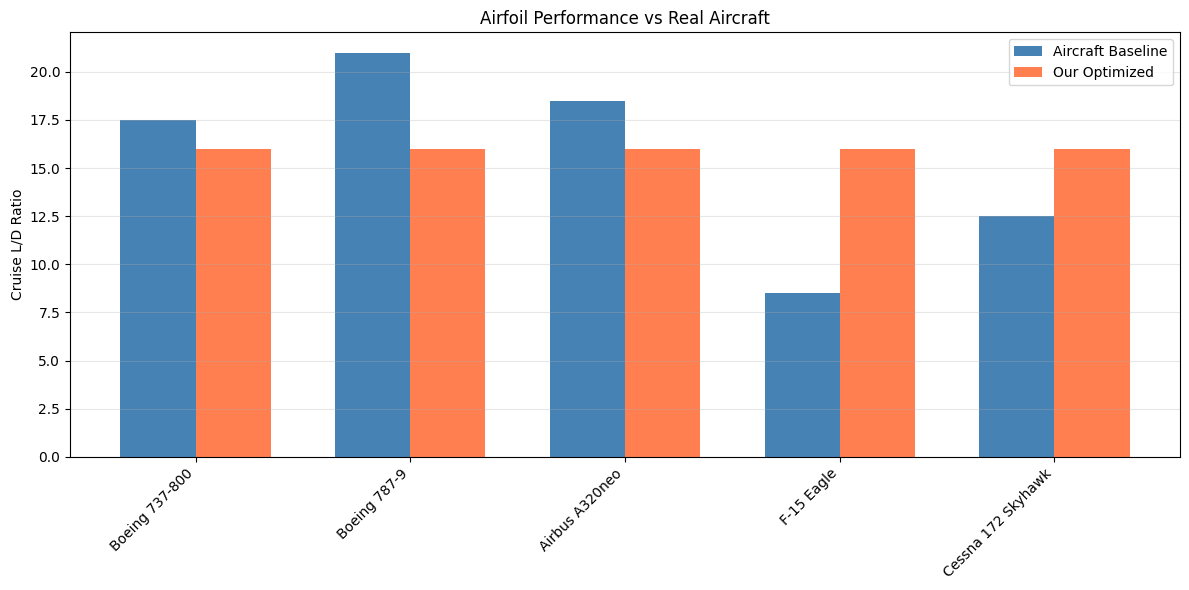

In [5]:
# Compare across all aircraft
results = benchmark.benchmark_all_aircraft(m_opt, p_opt, t_opt)

aircraft_names = []
baseline_lds = []
optimized_lds = []

for aircraft_id, data in results.items():
    if 'comparison' in data:
        aircraft_names.append(AIRCRAFT_DATABASE[aircraft_id].name)
        baseline_lds.append(data['comparison']['aircraft_ld'])
        optimized_lds.append(data['comparison']['optimized_ld'])

x = np.arange(len(aircraft_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, baseline_lds, width, label='Aircraft Baseline', color='steelblue')
bars2 = ax.bar(x + width/2, optimized_lds, width, label='Our Optimized', color='coral')

ax.set_ylabel('Cruise L/D Ratio')
ax.set_title('Airfoil Performance vs Real Aircraft')
ax.set_xticks(x)
ax.set_xticklabels(aircraft_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/aircraft_comparison.png', dpi=300)
plt.show()